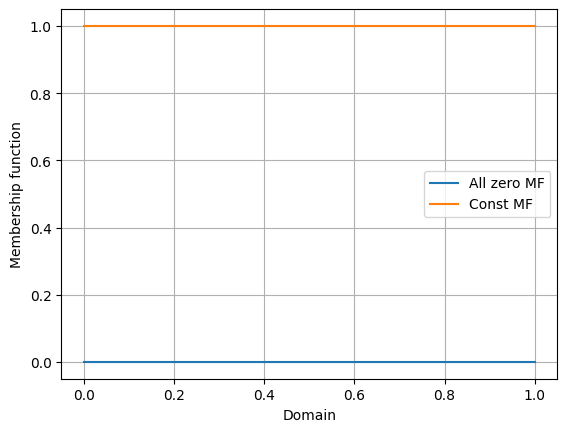

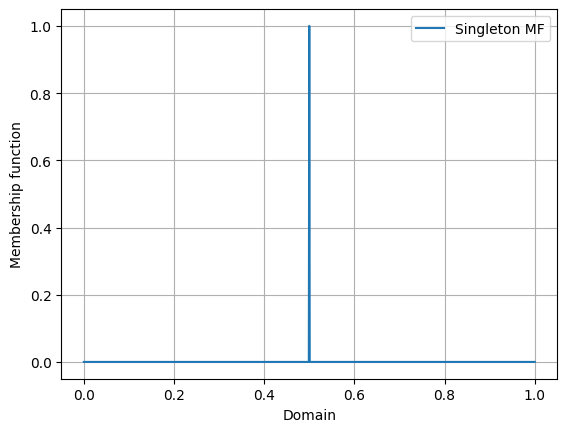

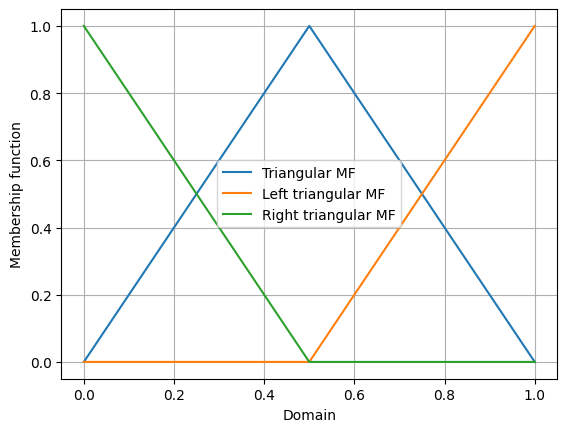

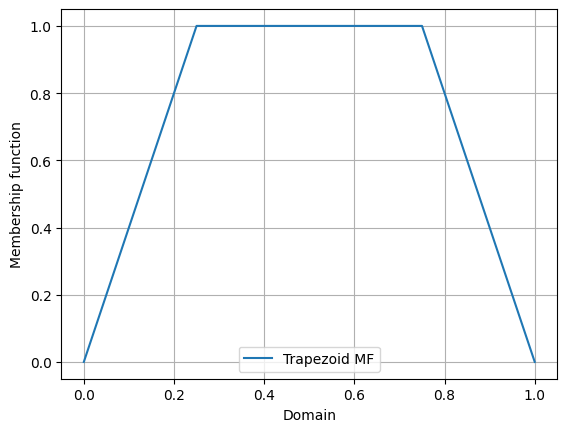

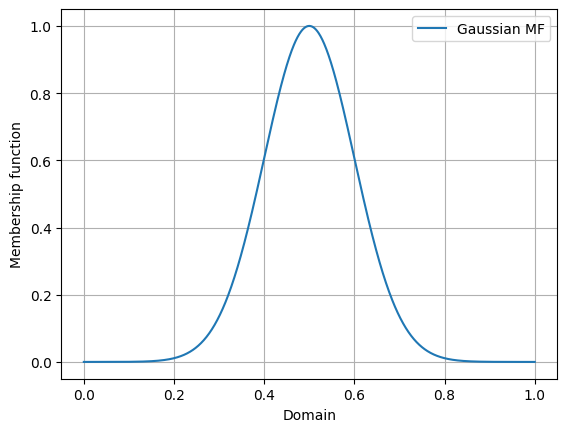

In [1]:
!pip install pyit2fls
from numpy import linspace
import matplotlib.pyplot as plt
from pyit2fls import zero_mf, singleton_mf, const_mf, tri_mf, ltri_mf, rtri_mf, \
    trapezoid_mf, gaussian_mf
domain = linspace(0., 1., 1001)
zero = zero_mf(domain)
singleton = singleton_mf(domain, [0.5, 1.])
const = const_mf(domain, [1.])
tri = tri_mf(domain, [0., 0.5, 1., 1.])
ltri = ltri_mf(domain, [0.5, 1., 1.])
rtri = rtri_mf(domain, [0.5, 0., 1.])
trapezoid = trapezoid_mf(domain, [0., 0.25, 0.75, 1., 1.])
gaussian = gaussian_mf(domain, [0.5, 0.1, 1.])
plt.figure()
plt.plot(domain, zero, label="All zero MF")
plt.plot(domain, const, label="Const MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()
plt.figure()
plt.plot(domain, singleton, label="Singleton MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()
plt.figure()
plt.plot(domain, tri, label="Triangular MF")
plt.plot(domain, ltri, label="Left triangular MF")
plt.plot(domain, rtri, label="Right triangular MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()
plt.figure()
plt.plot(domain, trapezoid, label="Trapezoid MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()
plt.figure()
plt.plot(domain, gaussian, label="Gaussian MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()


In [2]:
#Importing necessary libraries - for array operations and calculations.
import numpy as np

# Several special methods (e.g., __or__, __and__, __invert__, __sub__, __mul__, __mod__)
# are defined for overloaded operators to perform fuzzy set operations such as union,
# intersection, inversion, subtraction, multiplication, and Cartesian product.


class FuzzySet:
    def __init__(self, iterable: any):
        self.f_set = set(iterable)
        self.f_list = list(iterable)
        self.f_len = len(iterable)
        for elem in self.f_set:
            if not isinstance(elem, tuple):
                raise TypeError("No tuples in the fuzzy set")
            if not isinstance(elem[1], float):
                raise ValueError("Probabilities not assigned to elements")

    def __or__(self, other):
        # fuzzy set union
        if len(self.f_set) != len(other.f_set):
            raise ValueError("Length of the sets is different")
        f_set = [x for x in self.f_set]
        other = [x for x in other.f_set]
        return FuzzySet([f_set[i] if f_set[i][1] > other[i][1] else other[i] for i in range(len(self))])

    def __and__(self, other):
        # fuzzy set intersection
        if len(self.f_set) != len(other.f_set):
            raise ValueError("Length of the sets is different")
        f_set = [x for x in self.f_set]
        other = [x for x in other.f_set]

        return FuzzySet([f_set[i] if f_set[i][1] < other[i][1] else other[i] for i in range(len(self))])

    def __invert__(self):
        f_set = [x for x in self.f_set]
        for indx, elem in enumerate(f_set):
            f_set[indx] = (elem[0], float(round(1 - elem[1], 2)))
        return FuzzySet(f_set)

    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError("Length of the sets is different")
        return self & ~other

    def __mul__(self, other):
        if len(self) != len(other):
            raise ValueError("Length of the sets is different")
        return FuzzySet([(self[i][0], self[i][1] * other[i][1]) for i in range(len(self))])

    def __mod__(self, other):
        # cartesian product
        print(f'The size of the relation will be: {len(self)}x{len(other)} ')
        mx = self
        mi = other
        tmp = [[] for i in range(len(mx))]
        i = 0
        for x in mx:
            for y in mi:
                tmp[i].append(min(x[1], y[1]))
            i += 1
        return np.array(tmp)

#     max_min static method:
# This method calculates the max-min composition of two arrays using nested loops to
#find the maximum of the minimum values of corresponding elements.

    @staticmethod
    def max_min(array1: np.ndarray, array2: np.ndarray):
        tmp = np.zeros((array1.shape[0], array2.shape[1]))
        t = list()
        for i in range(len(array1)):
            for j in range(len(array2[0])):
                for k in range(len(array2)):
                    t.append(round(min(array1[i][k], array2[k][j]), 2))
                tmp[i][j] = max(t)
                t.clear()
        return tmp

# __len__: Calculates the length of the fuzzy set (the number of elements).
# __str__: Returns a string representation of the fuzzy set.
# __getitem__: Allows indexing into the fuzzy set.
# __iter__: Allows iterating through the elements of the fuzzy set.


    def __len__(self):
        self.f_len = sum([1 for i in self.f_set])
        return self.f_len

    def __str__(self):
        return f'{[x for x in self.f_set]}'

    def __getitem__(self, item):
        return self.f_list[item]

    def __iter__(self):
        for i in range(len(self)):
            yield self[i]


a = FuzzySet({('x1', 0.5), ('x2', 0.7), ('x3', 0.0)})
b = FuzzySet({('x1', 0.8), ('x2', 0.2), ('x3', 1.0)})
c = FuzzySet({('x', 0.3), ('y', 0.3), ('z', 0.5)})
x = FuzzySet({('a', 0.5), ('b', 0.3), ('c', 0.7)})
y = FuzzySet({('a', 0.6), ('b', 0.4)})
print(f'a -> {a}')
print(f'b -> {b}')
print(f'Fuzzy union: \n{a | b}')
print(f'Fuzzy intersection: \n{a & b}')
print(f'Fuzzy inversion of b: \n{~b}')
print(f"Fuzzy inversion of a: \n {~a}")
print(f'Fuzzy Subtraction: \n{a - b}')

r = np.array([[0.6, 0.6, 0.8, 0.9], [0.1, 0.2, 0.9, 0.8], [0.9, 0.3, 0.4, 0.8], [0.9, 0.8, 0.1, 0.2]])
s = np.array([[0.1, 0.2, 0.7, 0.9], [1.0, 1.0, 0.4, 0.6], [0.0, 0.0, 0.5, 0.9], [0.9, 1.0, 0.8, 0.2]])
print(f"Max Min: of \n{r} \nand \n{s}\n:\n\n")

print(FuzzySet.max_min(r, s))


a -> [('x1', 0.5), ('x3', 0.0), ('x2', 0.7)]
b -> [('x1', 0.8), ('x2', 0.2), ('x3', 1.0)]
Fuzzy union: 
[('x1', 0.8), ('x2', 0.2), ('x3', 1.0)]
Fuzzy intersection: 
[('x1', 0.5), ('x3', 0.0), ('x2', 0.7)]
Fuzzy inversion of b: 
[('x1', 0.2), ('x3', 0.0), ('x2', 0.8)]
Fuzzy inversion of a: 
 [('x2', 0.3), ('x1', 0.5), ('x3', 1.0)]
Fuzzy Subtraction: 
[('x1', 0.2), ('x3', 0.0), ('x2', 0.7)]
Max Min: of 
[[0.6 0.6 0.8 0.9]
 [0.1 0.2 0.9 0.8]
 [0.9 0.3 0.4 0.8]
 [0.9 0.8 0.1 0.2]] 
and 
[[0.1 0.2 0.7 0.9]
 [1.  1.  0.4 0.6]
 [0.  0.  0.5 0.9]
 [0.9 1.  0.8 0.2]]
:


[[0.9 0.9 0.8 0.8]
 [0.8 0.8 0.8 0.9]
 [0.8 0.8 0.8 0.9]
 [0.8 0.8 0.7 0.9]]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=5217ef4b83ba861fb9ab12b9933568c5c18cd1b54ca531e8eed919ebdecf3341
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Enter Type of Dirtiness [0-100]70
Enter Degree of Dirtiness [0-100]80
35.410245759778455


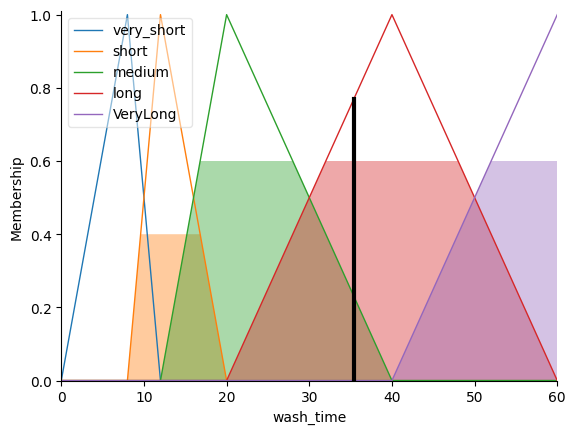

In [3]:
!pip install scikit-fuzzy
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np
class washing_machine:

    degree_dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'degree_dirt')
    type_dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'type_dirt')
    wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')

    degree_names = ['Low', 'Medium', 'High']
    type_names = ['NonFat', 'Medium', 'Fat']

    #Outputing them into auto-membership functions
    degree_dirt.automf(names=degree_names)
    type_dirt.automf(names=type_names)

    # Washing Time Universe
    wash_time['very_short'] = fuzz.trimf(wash_time.universe, [0, 8, 12])
    wash_time['short'] = fuzz.trimf(wash_time.universe, [8, 12, 20])
    wash_time['medium'] = fuzz.trimf(wash_time.universe, [12, 20, 40])
    wash_time['long'] = fuzz.trimf(wash_time.universe, [20, 40, 60])
    wash_time['VeryLong'] = fuzz.trimf(wash_time.universe, [40, 60, 60])

    # Rule Application
    rule1 = ctrl.Rule(degree_dirt['High'] | type_dirt['Fat'], wash_time['VeryLong'])
    rule2 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['Fat'], wash_time['long'])
    rule3 = ctrl.Rule(degree_dirt['Low'] | type_dirt['Fat'], wash_time['long'])
    rule4 = ctrl.Rule(degree_dirt['High'] | type_dirt['Medium'], wash_time['long'])
    rule5 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['Medium'], wash_time['medium'])
    rule6 = ctrl.Rule(degree_dirt['Low'] | type_dirt['Medium'], wash_time['medium'])
    rule7 = ctrl.Rule(degree_dirt['High'] | type_dirt['NonFat'], wash_time['medium'])
    rule8 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['NonFat'], wash_time['short'])
    rule9 = ctrl.Rule(degree_dirt['Low'] | type_dirt['NonFat'], wash_time['very_short'])

    # Washing Control Simulation
    washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
    washing = ctrl.ControlSystemSimulation(washing_ctrl)

def fuzzify_laundry(fuzz_type,fuzz_degree):

    washing_machine.washing.input['type_dirt'] = fuzz_type
    washing_machine.washing.input['degree_dirt'] = fuzz_degree

    washing_machine.washing.compute()

    washing_machine.wash_time.view(sim=washing_machine.washing)

    return washing_machine.washing.output['wash_time']
def compute_washing_parameters(type_of_dirt,degree_of_dirt):

    if type_of_dirt < 0.0 or type_of_dirt > 100.0:
        raise Exception("Invalid Type of Dirtiness: %lf" %type_of_dirt)
    if degree_of_dirt < 0.0 or type_of_dirt > 100.0:
        raise Exception("Invalid Degree of Dirtiness: %lf" %degree_of_dirt)

    type_fuzzy = fuzzify_laundry(type_of_dirt,degree_of_dirt)

    return type_fuzzy
if __name__ == "__main__":
    type_of_dirt = float(input("Enter Type of Dirtiness [0-100]"))
    degree_of_dirt = float(input("Enter Degree of Dirtiness [0-100]"))
    washing_parameters = compute_washing_parameters(type_of_dirt,degree_of_dirt)
    print(washing_parameters)
